
### Emissão de carbono é uma expressão que faz referência ao lançamento de gases de efeito estufa na atmosfera, principalmente o dióxido de carbono (CO2) — ou gás carbônico.


### Os gases de efeito estufa são assim chamados por reterem parte da radiação solar que chega ao planeta, tornando-o mais quente. A organização WWF Brasil explica que esse fenômeno, por si só, é natural. O problema é o volume de gases oriundo da interferência humana no meio ambiente. O excesso faz a temperatura da Terra aumentar de modo preocupante.


### O aquecimento global pode ter (e tem) numerosas consequências, como aumento de eventos climáticos extremos. Tsunamis, períodos prolongados de seca e inundações fora de época são alguns exemplos. O aumento de doenças respiratórias também é um efeito possível.

## Importar as bibliotecas necessárias

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display_html

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

## Ler o dataset

In [2]:
LOCAL_EXEC = False

if LOCAL_EXEC:
    df = pd.read_csv('data/co2_emissions_tonnes_per_person.csv')
else:
    data = requests.get('https://raw.githubusercontent.com/samuelsemmler/Mackenzie-Data-Science/develop/ParadigmasDeLinguagensDeProgramacaoParaCienciaDeDados/trilha4/data/co2_emissions_tonnes_per_person.csv').text
    data = StringIO(data)
    df = pd.read_csv(data)

In [3]:
df.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


## Perguntas

### Quais foram os 10 países que mais emitiram CO2 em 1990?

In [4]:
df_1990_largest = df[['country', '1990']].nlargest(10, '1990')
df_1990_largest.head()

,country,1990
145,Qatar,36.2
105,Luxembourg,32.3
4,United Arab Emirates,29.3
17,Bahrain,23.3
54,Estonia,22.0


<AxesSubplot:xlabel='country', ylabel='1990'>

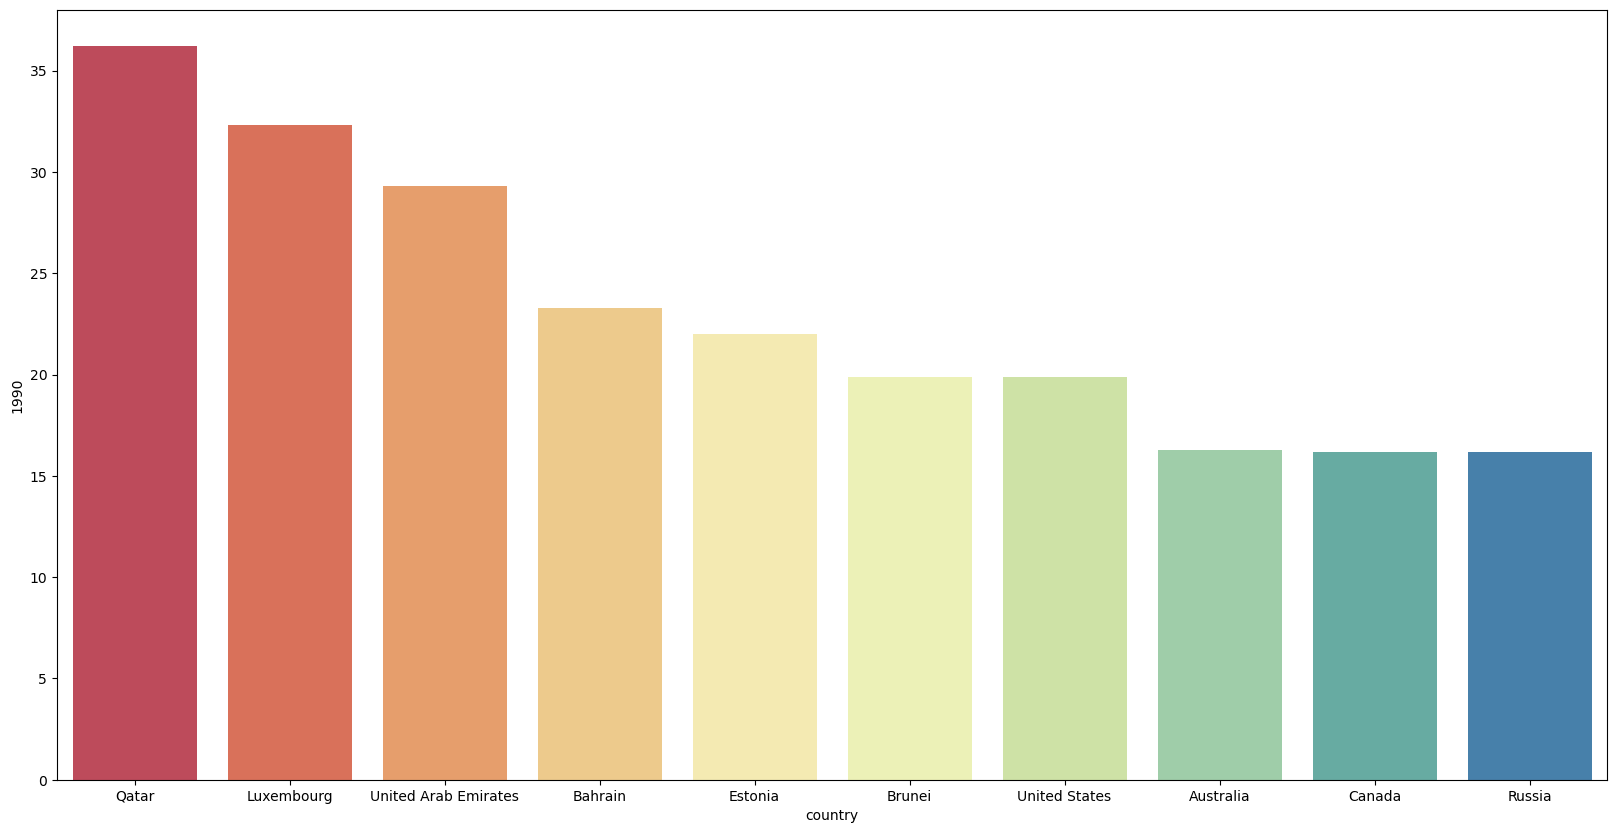

In [5]:
fig = plt.figure(figsize=(20, 10))
sns.barplot(
    data=df_1990_largest,
    x=df_1990_largest['country'],
    y=df_1990_largest['1990'],
    palette='Spectral'
)

### Quais foram os 10 países que menos emitiram CO2 em 1990?

In [6]:
df_1990_smallest = df[['country', '1990']].nsmallest(10, '1990')
df_1990_smallest.head()

,country,1990
34,Cameroon,0.00465
11,Burundi,0.04280
180,Uganda,0.04370
114,Mali,0.05030
130,Nepal,0.05530


<AxesSubplot:xlabel='country', ylabel='1990'>

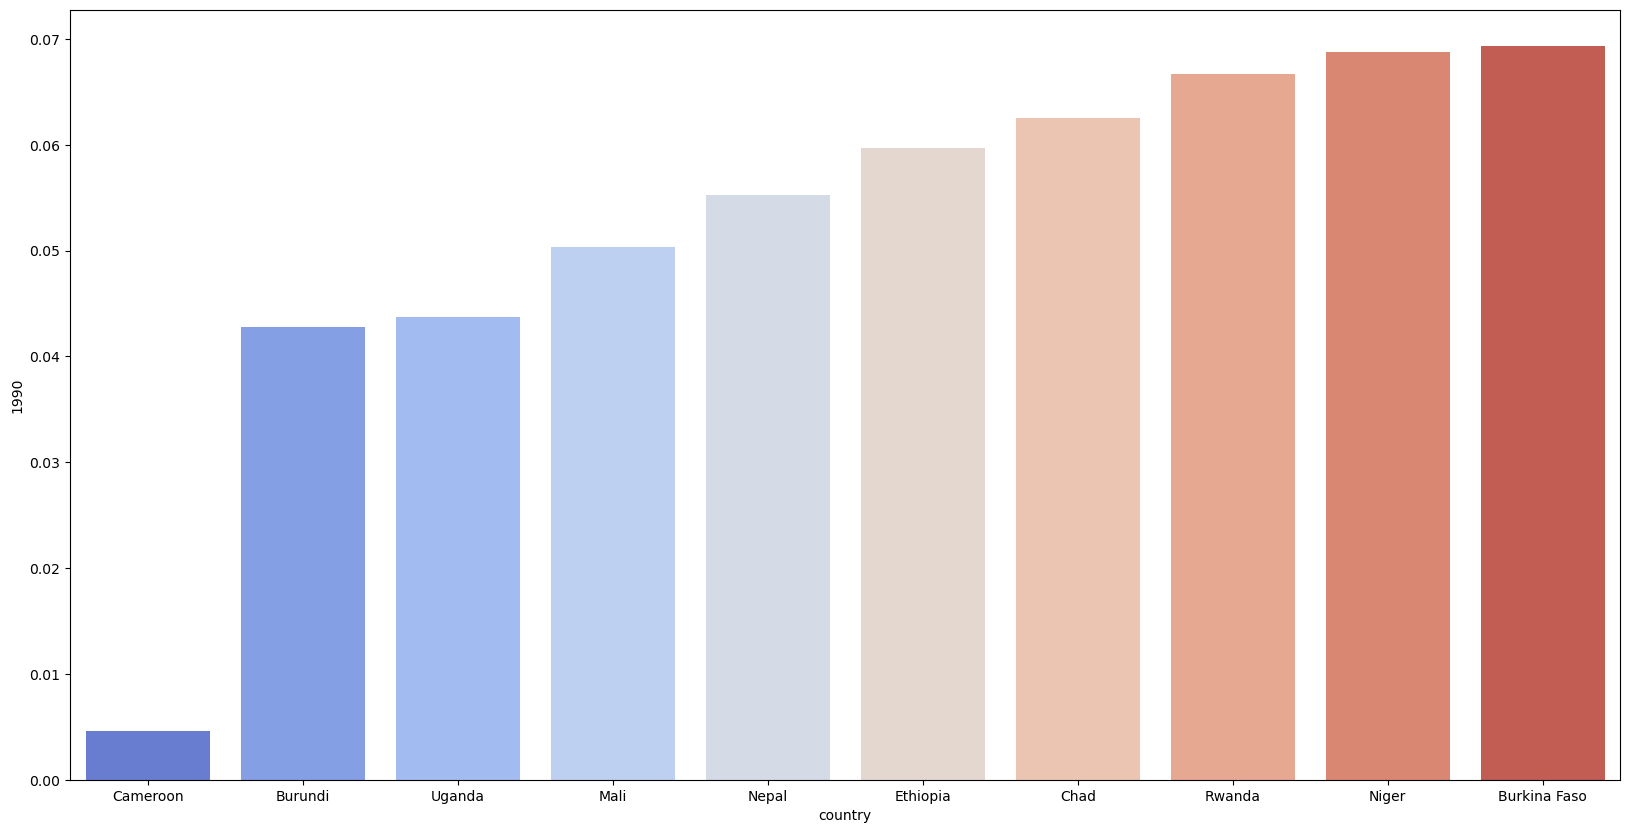

In [7]:
fig = plt.figure(figsize=(20, 10))
sns.barplot(
    data=df_1990_smallest,
    x=df_1990_smallest['country'],
    y=df_1990_smallest['1990'],
    palette='coolwarm'
)

### Quais foram os 10 países que mais emitiram CO2 em 2017?

In [8]:
df_2017_largest = df[['country', '2017']].nlargest(10, '2017')
df_2017_largest.head()

,country,2017
145,Qatar,38.0
174,Trinidad and Tobago,31.3
95,Kuwait,23.7
4,United Arab Emirates,21.4
17,Bahrain,19.8


<AxesSubplot:xlabel='country', ylabel='2017'>

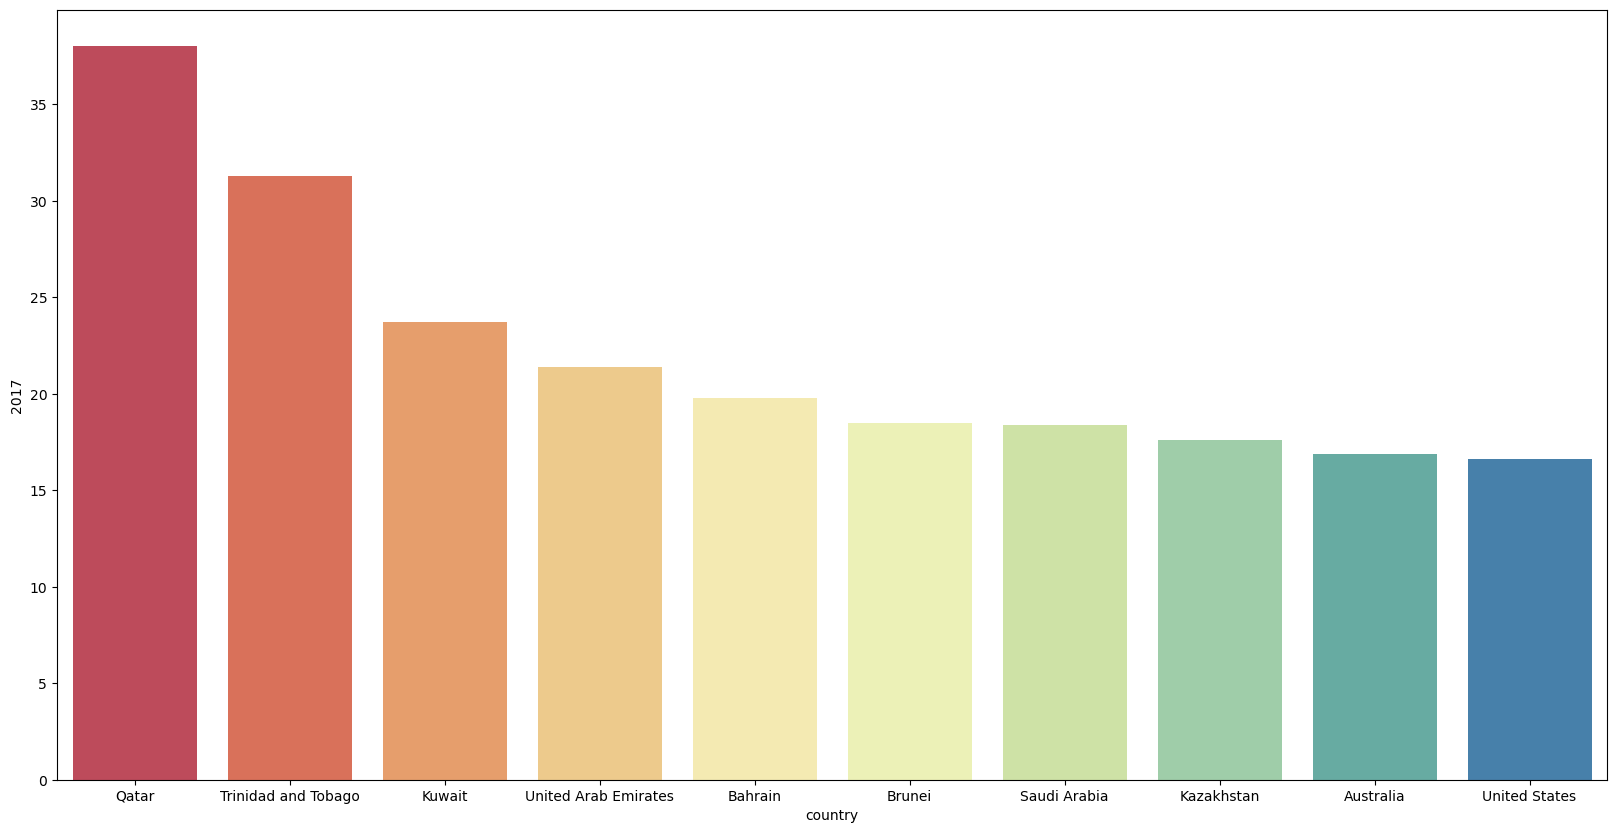

In [9]:
fig = plt.figure(figsize=(20, 10))
sns.barplot(
    data=df_2017_largest,
    x=df_2017_largest['country'],
    y=df_2017_largest['2017'],
    palette='Spectral'
)

### Quais foram os 10 países que menos emitiram CO2 em 2017?

In [10]:
df_2017_smallest = df[['country', '2017']].nsmallest(10, '2017')
df_2017_smallest.head()

,country,2017
35,"Congo, Dem. Rep.",0.0243
156,Somalia,0.0466
11,Burundi,0.0467
28,Central African Republic,0.0651
167,Chad,0.0656


<AxesSubplot:xlabel='country', ylabel='2017'>

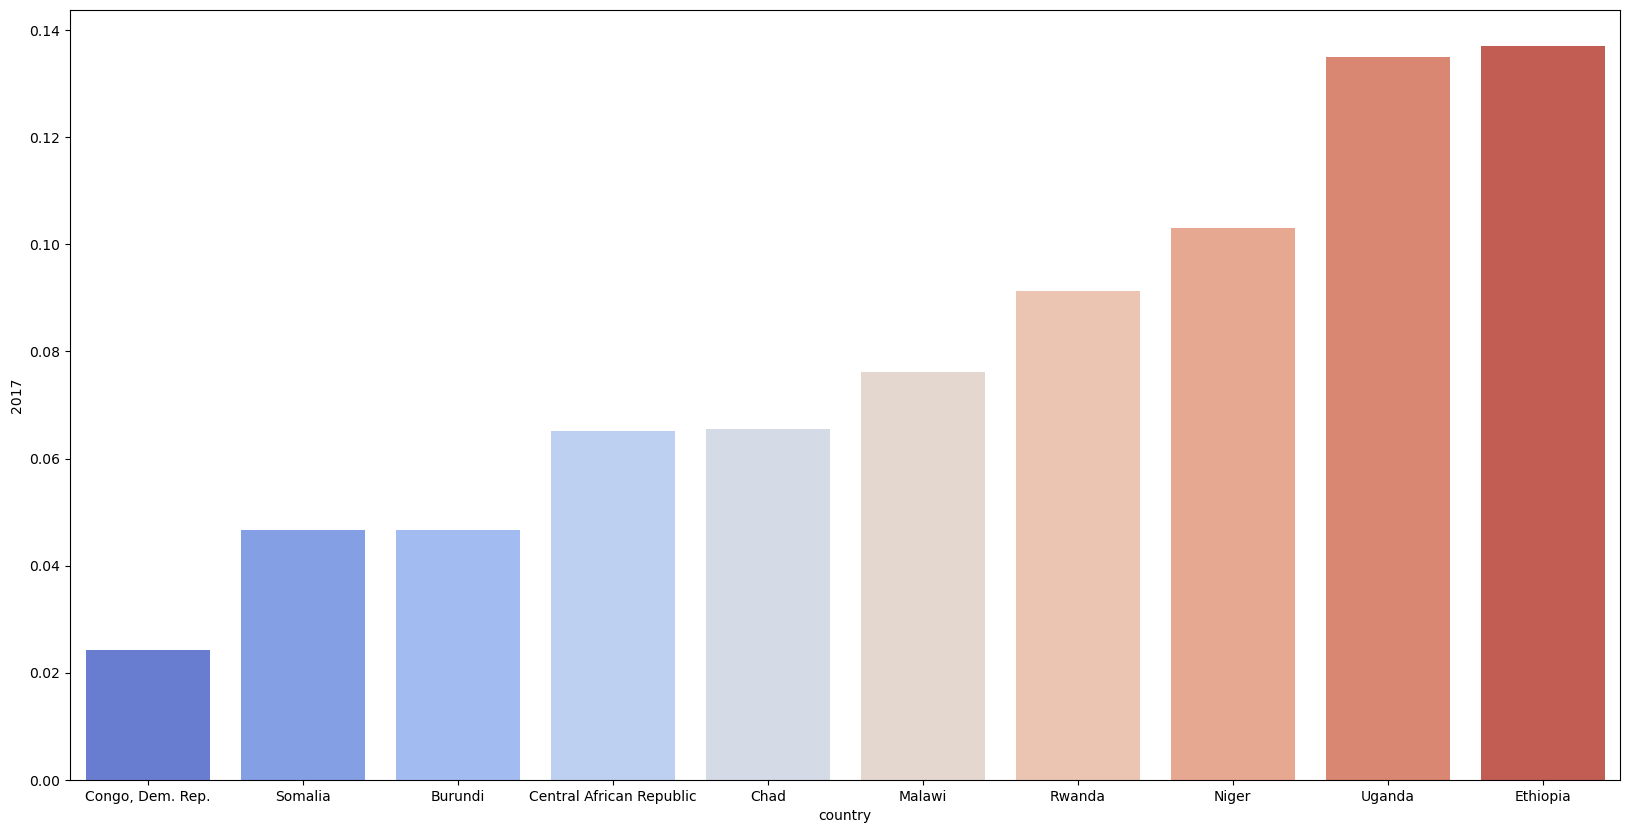

In [11]:
fig = plt.figure(figsize=(20, 10))
sns.barplot(
    data=df_2017_smallest,
    x=df_2017_smallest['country'],
    y=df_2017_smallest['2017'],
    palette='coolwarm'
)

### Qual é a emissão do brasil entre 1970 e 2017?

In [12]:
columns = [str(x) for x in list(range(1970, 2018))]
columns.insert(0, 'country')
df_brasil = df[columns].loc[df['country'] == 'Brazil']
df_brasil


,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
23,Brazil,1.05,1.14,1.29,1.37,1.4,1.41,1.44,1.53,1.59,...,1.86,2.1,2.18,2.31,2.46,2.59,2.42,2.2,2.23,2.18


<AxesSubplot:>

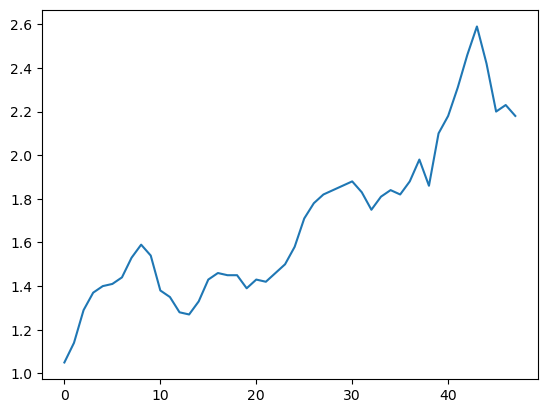

In [13]:
# get list of values from 1990 to 2017
columns.remove('country')
sns.lineplot(
    data=[df_brasil[x].item() for x in columns],
)

## Conclusão

### Paises que mais emitiram CO2 em 1990 e 2017

In [14]:
df1 = df_1990_largest.copy()
df2 = df_2017_largest.copy()

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Max CO2 1990')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Max CO2 2017')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,country,1990
145,Qatar,36.200000
105,Luxembourg,32.300000
4,United Arab Emirates,29.300000
17,Bahrain,23.300000
54,Estonia,22.000000
25,Brunei,19.900000
183,United States,19.900000
8,Australia,16.300000
29,Canada,16.200000
147,Russia,16.200000


> Os países citados acima foram os que mais emitiram CO2 no ano de 1990 e no ano de 2017, por este motivo, podemos dizer que são os que mais contribuem para mudanças climáticas no mundo.

### Paises que menos emitiram CO2 em 1990 e 2017

In [15]:
df1 = df_1990_smallest.copy()
df2 = df_2017_smallest.copy()

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Max CO2 1990')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Max CO2 2017')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,country,1990
34,Cameroon,0.004650
11,Burundi,0.042800
180,Uganda,0.043700
114,Mali,0.050300
130,Nepal,0.055300
55,Ethiopia,0.059700
167,Chad,0.062500
148,Rwanda,0.066700
125,Niger,0.068800
14,Burkina Faso,0.069300


### Emissao de CO2 do Brasil entre 1990 e 2017

In [16]:
df_brasil

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
23,Brazil,1.05,1.14,1.29,1.37,1.4,1.41,1.44,1.53,1.59,...,1.86,2.1,2.18,2.31,2.46,2.59,2.42,2.2,2.23,2.18


#### Compreendendo dados de 1970 a 2017, é possível distinguir que a curva de emissões brasileiras mudou de trajetória algumas vezes nas últimas décadas.

> No período de 1990 a 2004, houve um crescimento intenso das emissões. Foram os anos de aumento expressivo no desmatamento da Amazônia, mas também os outros setores cresceram. Entre 2004 e 2010, uma mudança de trajetória em que o combate ao desmatamento surte efeito, e as emissões caem. De 2010 até hoje, temos o cenário atual: emissões estagnadas mais ou menos no mesmo patamar.